In [117]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
rideshare= pd.merge(city_data, ride_data, on=["city"], how="outer")

# Display the data table for preview
rideshare.head()


,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [118]:
#groupby type and define variables
urban = rideshare.loc[rideshare["type"] == "Urban", : ]
urban_group = urban.groupby(["city"])
urban_city_count = urban_group["city"].nunique()
urban_avg_fare = urban_group["fare"].mean()
urban_total_rides = urban_group["ride_id"].count()
urban_driver_count = urban_group["driver_count"].max()
urban_driver_count_adj = urban_driver_count * 10


suburban = rideshare.loc[rideshare["type"] == "Suburban", : ]
suburban_group = suburban.groupby(["city"])
suburban_city_count = suburban_group["city"].nunique()
suburban_avg_fare = suburban_group["fare"].mean()
suburban_total_rides = suburban_group["ride_id"].count()
suburban_driver_count = suburban_group["driver_count"].max()
suburban_driver_count_adj = suburban_driver_count * 10

rural = rideshare.loc[rideshare["type"] == "Rural", : ]
rural_group = rural.groupby(["city"])
rural_city_count = rural_group["city"].nunique()
rural_avg_fare = rural_group["fare"].mean()
rural_total_rides = rural_group["ride_id"].count()
rural_driver_count = rural_group["driver_count"].max()
rural_driver_count_adj = rural_driver_count * 10
 



## Bubble Plot of Ride Sharing Data

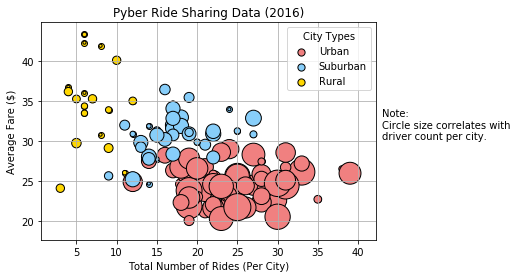

In [126]:
# Obtain the x and y coordinates for each of the three city types

# Build the scatter plots for each city types
urban = plt.scatter(urban_total_rides, urban_avg_fare, marker="o", facecolors="lightcoral", edgecolors="black", label="Urban")
suburban = plt.scatter(suburban_total_rides, suburban_avg_fare, marker="o", facecolors="lightskyblue", edgecolors="black", label="Suburban")
rural = plt.scatter(rural_total_rides, rural_avg_fare, marker="o", facecolors="gold", edgecolors="black", label="Rural")

plt.scatter(urban_total_rides, urban_avg_fare, marker="o", facecolors="lightcoral", s=urban_driver_count_adj, edgecolors="black", label="Urban")
plt.scatter(suburban_total_rides, suburban_avg_fare, marker="o", facecolors="lightskyblue", s=suburban_driver_count_adj, edgecolors="black", label="Suburban")
plt.scatter(rural_total_rides, rural_avg_fare, marker="o", facecolors="gold", s=rural_driver_count_adj, edgecolors="black", label="Rural")


# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid()
plt.text(43,32, "Note:\nCircle size correlates with\ndriver count per city.", horizontalalignment='left', verticalalignment='center')

# Create a legend
plt.legend(handles=[urban, suburban, rural], loc="best", title="City Types", markerscale=1.2 )


# Incorporate a text label regarding circle size

# Save Figure
plt.savefig("../Images/Bubble_Plot")

# Show plot
plt.show()

## Total Fares by City Type

In [120]:
# Calculate Type Percents
group_type = rideshare.groupby(['type'])
fare_group = group_type['fare'].sum()


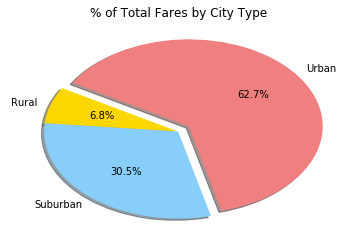

<Figure size 432x288 with 0 Axes>

In [121]:
# Build Pie Chart
types = ('Rural','Suburban','Urban')
color_set = ('gold','lightskyblue','lightcoral')
explode = (0,0,0.1)

# Show Figure
plt.pie(fare_group, explode=explode, labels = types, colors=color_set, autopct = "%1.1f%%", shadow=True , startangle=150)
plt.title("% of Total Fares by City Type")

plt.show()

# Save Figure
plt.savefig("../Images/%total_fares")

## Total Rides by City Type

In [122]:
# Calculate Ride Percents
ride_group = group_type['ride_id'].count()
# Build Pie Chart

types = ('Rural','Suburban','Urban')
color_set = ('gold','lightskyblue','lightcoral')
explode = (0,0,0.1)

# Save Figure
plt.savefig("../Images/%total_rides")

<Figure size 432x288 with 0 Axes>

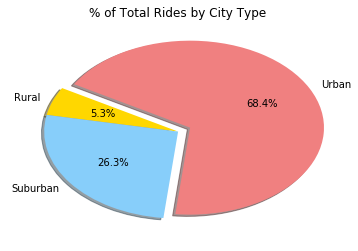

In [123]:
# Show Figure
plt.pie(ride_group, explode=explode, labels = types, colors=color_set, autopct = "%1.1f%%", shadow=True , startangle=150)
plt.title("% of Total Rides by City Type")
plt.show()

## Total Drivers by City Type

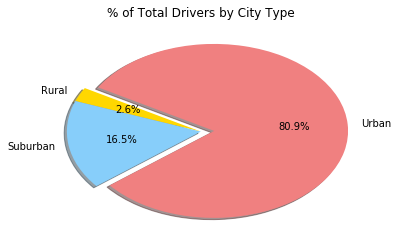

<Figure size 432x288 with 0 Axes>

In [124]:
# Calculate Driver Percents
city_group = rideshare.groupby(['city'])
city_driver = city_group['driver_count'].max()
city_df = pd.DataFrame(data=city_driver)

city_type = city_group['type'].max()
driver_df = pd.DataFrame(data=city_type)

driver_city= pd.merge(driver_df, city_df, on=["city"], how="outer")
type_driver = driver_city.groupby(['type'])
driver_total = type_driver['driver_count'].sum()

# Build Pie Charts

types = ('Rural','Suburban','Urban')
color_set = ('gold','lightskyblue','lightcoral')
explode = (0,0,0.1)

plt.pie(driver_total, explode=explode, labels = types, colors=color_set, autopct = "%1.1f%%", shadow=True , startangle=150)
plt.title("% of Total Drivers by City Type")
plt.show()

# Save Figure
plt.savefig("../Images/%total_drivers")